In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [18]:
# Define image dimensions and number of classes
IMG_WIDTH = 48
IMG_HEIGHT = 48
NUM_CLASSES = 7
EMOTION_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# A function to parse and prepare the data
def prepare_data(data):
    """
    Parses the pixel strings in the dataframe and reshapes them into images.
    Normalizes the images and one-hot encodes the labels.
    """
    image_array = np.zeros(shape=(len(data), IMG_HEIGHT, IMG_WIDTH, 1))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (IMG_HEIGHT, IMG_WIDTH, 1))
        image_array[i] = image

    image_array = image_array / 255.0
    image_label = to_categorical(image_label, num_classes=NUM_CLASSES)
    return image_array, image_label

# Load the dataset from the CSV file
# Ensure 'fer2013.csv' is in the same directory as your notebook
data = pd.read_csv('fer2013.csv')

# Split data into sets
X_train, y_train = prepare_data(data[data['Usage'] == 'Training'])
X_val, y_val = prepare_data(data[data['Usage'] == 'PublicTest'])
X_test, y_test = prepare_data(data[data['Usage'] == 'PrivateTest'])

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

Training samples: 28709
Validation samples: 3589
Test samples: 3589


In [19]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening and Dense Layers
model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(NUM_CLASSES, activation='softmax'))

C:\Users\nihar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,520,391 (21.06 MB)

 Trainable params: 5,518,471 (21.05 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [21]:
# Callbacks to improve training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Set training parameters
BATCH_SIZE = 64
EPOCHS = 50

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 343s 748ms/step - accuracy: 0.2856 - loss: 2.0000 - val_accuracy: 0.3608 - val_loss: 1.6011 - learning_rate: 5.0000e-04
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 333s 742ms/step - accuracy: 0.4497 - loss: 1.4717 - val_accuracy: 0.4678 - val_loss: 1.3668 - learning_rate: 5.0000e-04
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 336s 748ms/step - accuracy: 0.5164 - loss: 1.2710 - val_accuracy: 0.4784 - val_loss: 1.4070 - learning_rate: 5.0000e-04
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 339s 754ms/step - accuracy: 0.5575 - loss: 1.1812 - val_accuracy: 0.5266 - val_loss: 1.2341 - learning_rate: 5.0000e-04
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 342s 762ms/step - accuracy: 0.5806 - loss: 1.1184 - val_accuracy: 0.5428 - val_loss: 1.2107 - learning_rate: 5.0000e-04
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 356s 792ms/step - accuracy: 0.5938 - loss: 1.0833 - val_accuracy: 0.5687 - val_loss: 1.1639 - learning_rate: 5.0000e-04
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
# Evaluate the model on the test set
# This gives you the final performance metric on unseen data.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the trained model to a file
model.save("face_emotion_model.keras")
print("Model successfully saved as face_emotion_model.keras")

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.6530 - loss: 1.0188
Test Accuracy: 65.70%
Model successfully saved as face_emotion_model.keras


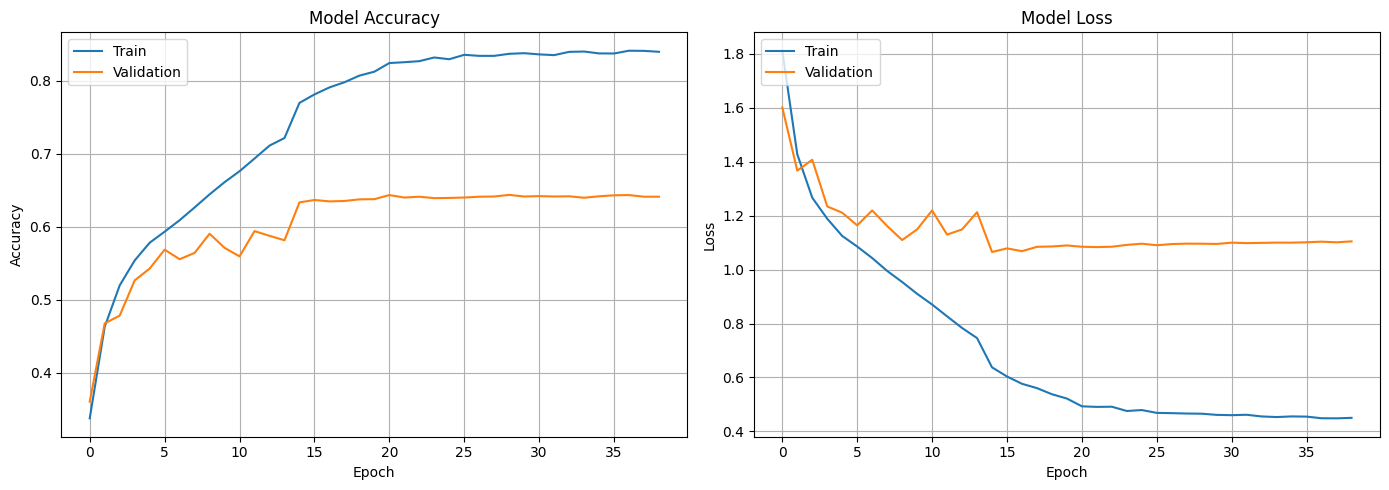

In [23]:
def plot_history(history):
    plt.figure(figsize=(14, 5))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the history from your training run
plot_history(history)
